### Overview
The *basemap* library is available through Anaconda and has a good selection of maps to choose from. Find some examples in their [official site](http://matplotlib.org/basemap/users/examples.html). The projection argument determines how the map will be rendered. Available projections [are](http://matplotlib.org/basemap/users/mapsetup.html)

- contour(): draw contour lines.
- contourf(): draw filled contours.
- imshow(): draw an image.
- pcolor(): draw a pseudocolor plot.
- pcolormesh(): draw a pseudocolor plot (faster version for regular meshes).
- plot(): draw lines and/or markers.
- scatter(): draw points with markers.
- quiver(): draw vectors.
- barbs(): draw wind barbs.
- drawgreatcircle(): draw a great circle.


### Example
Easy map visualizations using shapefiles. Using the[naturalearthdata](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/) and tectonic shapefiles in this example. 

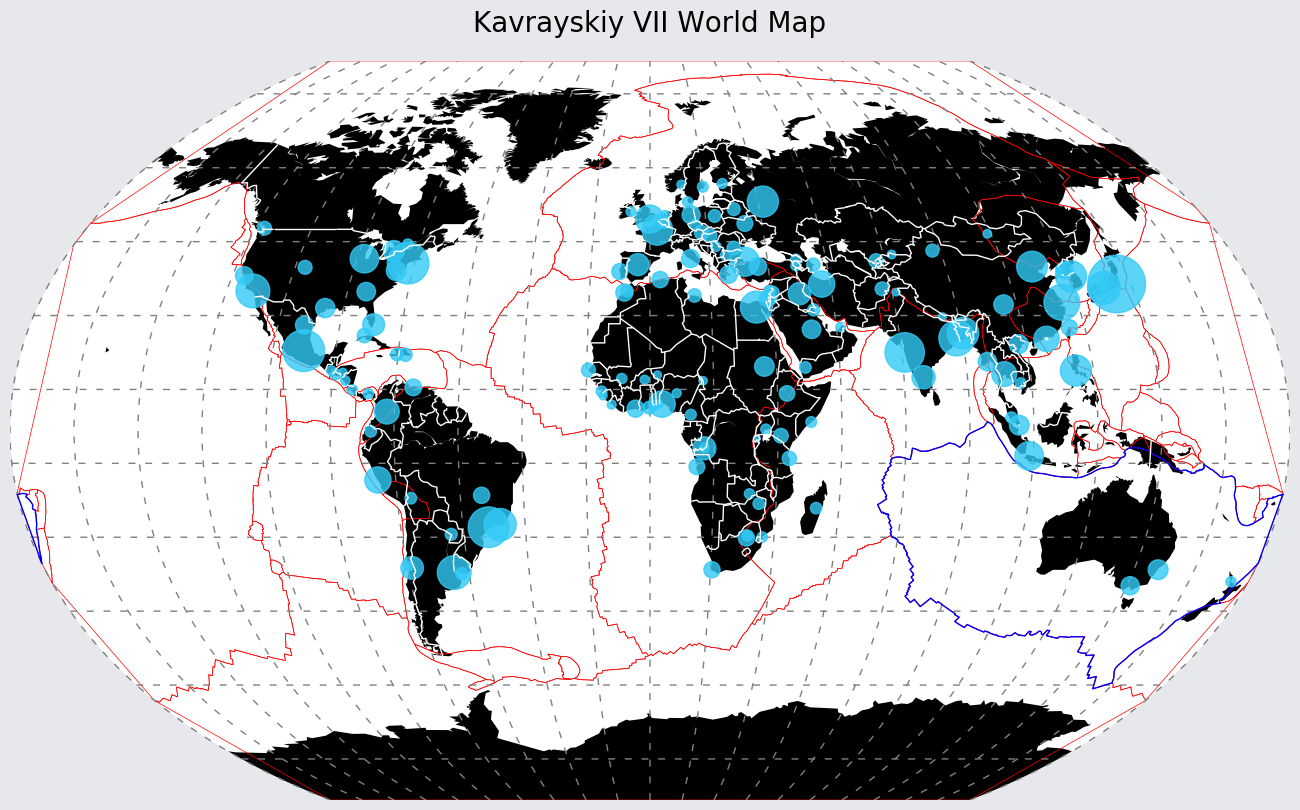

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

map_shapefile = 'shapefiles/ne_110m_populated_places'

b_map = Basemap(resolution='c',
                projection='kav7',
                lat_0=0.,   # center
                lon_0=0.)    # latitude and longitude 0


n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
line_width = 1
dashes = [5, 7]     # 5dots, 7spances, and repeat
graticules_color = 'grey'


fig1 = plt.figure(figsize=(16, 20))
fig1.patch.set_facecolor('#e6e8ec')
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

b_map.drawmapboundary(color='white',
                      linewidth=0.0,
                      fill_color='white')

b_map.drawparallels(parallels,
                    linewidth=line_width,
                    dashes=dashes,
                    color=graticules_color)

b_map.drawmeridians(meridians,
                    linewidth=line_width,
                    dashes=dashes,
                    color=graticules_color)

b_map.drawcoastlines(linewidth=0)

b_map.fillcontinents('black',
                     lake_color='white')

b_map.drawcountries(linewidth=1,
                    linestyle='solid',
                    color='white',
                    zorder=30)

title = plt.title('Kavrayskiy VII World Map', fontsize=20)
title.set_y(1.03)       # title offset

#plt.show()

# Adding overlays
# To draw an overlay on this map, read the coordinates from a shapefile, then use list comprehensions to extract the features using the file structure. 
# Then choose a draw mode (in this example scatter) and set its parameters.


b_map.readshapefile(map_shapefile,
                    name='populated_places',
                    drawbounds=False,
                    color='none')

populations = [r['POP2000'] for r in b_map.populated_places_info]
lats = [r['LATITUDE'] for r in b_map.populated_places_info]
lons = [r['LONGITUDE'] for r in b_map.populated_places_info]
x1, y1 = b_map(lons, lats)  # Project coordinates
b_map.scatter(x1, y1,
              s=np.array(populations) * 0.05,
              marker="o",
              color="#32caf6",
              zorder=10,
              alpha=0.8)

#plt.show()

# To add more elements to the map, simply repeat the above process using more shapefiles and add them to the same basemap. 

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

b_map.readshapefile('shapefiles/tectonicplates/PB2002_plates', 
               name='tectonic_plates', 
               drawbounds=True, 
               color='red')
        

# to mark a particular plate 'Australia' in blue color
for info, shape in zip(b_map.tectonic_plates_info, b_map.tectonic_plates):
    if info['PlateName'] == "Australia":
        x, y = zip(*shape) 
        b_map.plot(x, y, marker=None, color='b')    
    

plt.show()

    
# or fill in the plate
patches = []
for info, shape in zip(b_map.tectonic_plates_info, b_map.tectonic_plates):
    if info['PlateName'] == "Australia":
        patches.append(Polygon(np.array(shape), True))

#axis defined at the  beginning   
ax.add_collection(PatchCollection(patches, 
                                  facecolor='#32caf6', 
                                  edgecolor='none', 
                                  linewidths=1., 
                                  alpha=0.5,
                                  zorder=1))

plt.show()

### References
1. [maxberggren](http://maxberggren.github.io/2015/08/04/basemap/)
2. https://peak5390.wordpress.com/2012/12/08/matplotlib-basemap-tutorial-installing-matplotlib-and-basemap/ recommended install with `conda install basemap`
3. https://github.com/fraxen/tectonicplates